In [1]:
# Load dataset
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

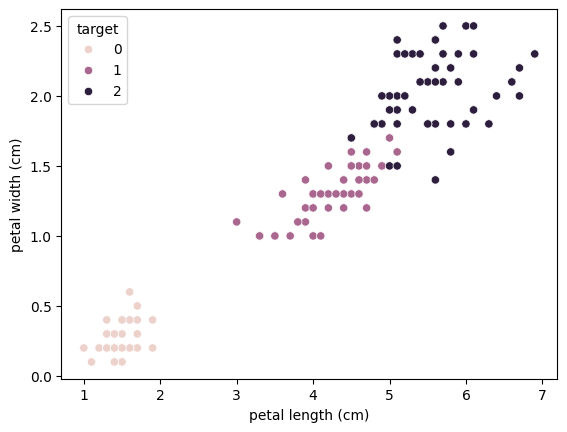

In [2]:
# Plotting scatterplot
import seaborn as sns
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='target', data=df)

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

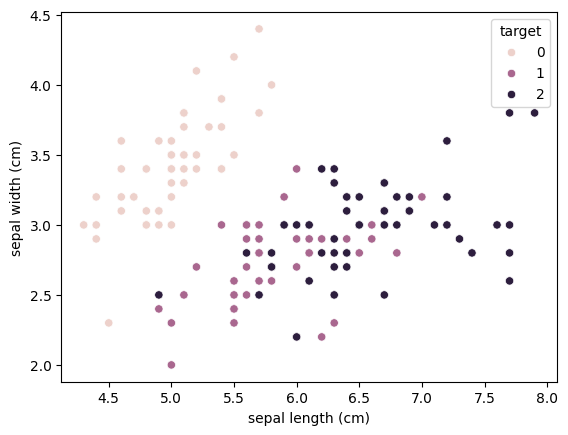

In [3]:
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='target', data=df)

In [4]:
# choosing only petal length and petal width for clustering
df = df.drop(['sepal length (cm)', 'sepal width (cm)', 'target'], axis=1)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Text(0, 0.5, 'SSE')

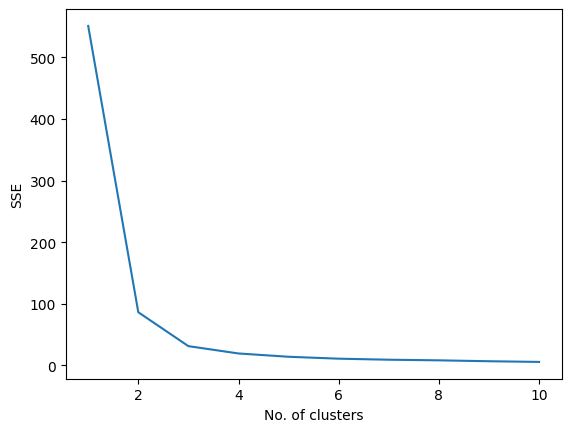

In [5]:
# Applying Elbow method to determine ideal no. of clusters(k)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for k in range(1, 11):
  km = KMeans(n_clusters=k, init="k-means++")
  km.fit(df)
  sse.append(km.inertia_)

plt.plot(range(1, 11), sse)
plt.xlabel('No. of clusters')
plt.ylabel('SSE')

In [6]:
# Applying kmeans on k=3
km = KMeans(n_clusters=3, init="k-means++")
y_pred = km.fit_predict(df)
print(y_pred)
print(km.cluster_centers_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]
[[4.29259259 1.35925926]
 [1.462      0.246     ]
 [5.62608696 2.04782609]]


In [8]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


<Axes: xlabel='petal length (cm)', ylabel='petal width (cm)'>

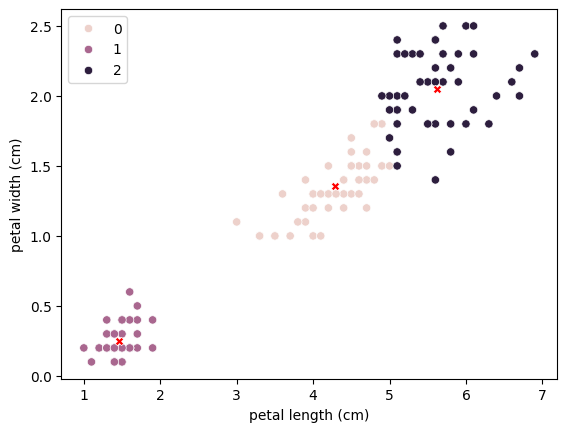

In [9]:
# Display the clusters
df['cluster'] = y_pred
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['cluster'])
sns.scatterplot(x=km.cluster_centers_[:,0], y=km.cluster_centers_[:, 1], color='red', marker='X')

In [10]:
# Evaluate how well the clusters are
from sklearn.metrics import silhouette_score
print(silhouette_score(df, y_pred))

0.79871441602181
